

# Laboratório 4: Regressão Logística

O câncer de mama  é o tipo de câncer mais comum entre mulheres e o segundo mais comum no mundo. O objetivo de desse laboratório será criar um modelo preditivo usando regressão Logística que, dadas as características de exames de uma paciente, será capaz de classificar o tumor como Maligno ou Benigno, a partir do aprendizado obtido no treinamento do algoritmo. Utilizando a base de dados disponível abaixo:
- Vamos carregar os dados
- Realizaremos uma análise exploratória
- Vamos realizar um pré processamento dos Dados
- Aplicação do modelo de regressão Logística
- Apresentação dos resultados


#### Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Importar bibliotecas


In [198]:
!pip install imbalanced-learn

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
%matplotlib inline
pd.options.display.max_rows = 1000

## Obter dados
** Leia o arquivo data.csv e grave-o em um DataFrame chamado bcw. **

In [200]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


OBS: tenho somente 1 variavel categorica, demais variaveis sao numericas. Necessário fazer uma normalizacao e deixar numa mesma escala.

## Análise exploratória dos dados

### Detalhando o dataset

In [201]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [202]:
## conhecendo melhor cada variavel
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [203]:
## validando existencia de valores nulos
dataset.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

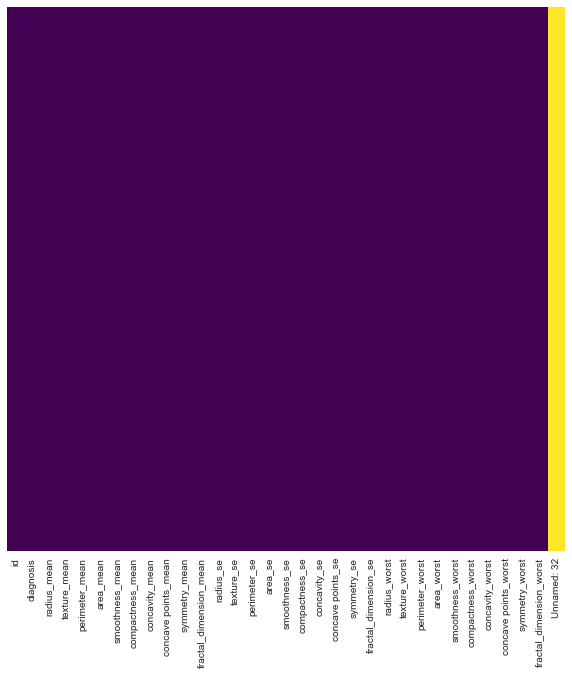

In [204]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

OBS: Coluna "Unnamed: 32" possui 100% dos valores nulos, será removida na fase de Preparação do Dados.

### Grafico detalhando a classe alvo

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

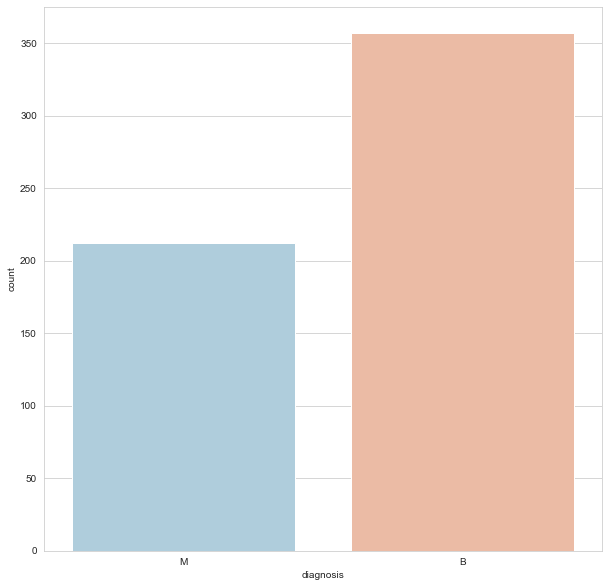

In [205]:
## Grafico representando dados referentes ao numero de diagnosticos de cada categoria
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.countplot(x='diagnosis',data=dataset,palette='RdBu_r')

OBS: O dataset esta desbalanceado, é interessante balancear a base de dados. Para evitar que modelos de ML aprendam muito mais sobre uma classe doq de outra.


### Mapa de calor representando a correlação entre variáveis

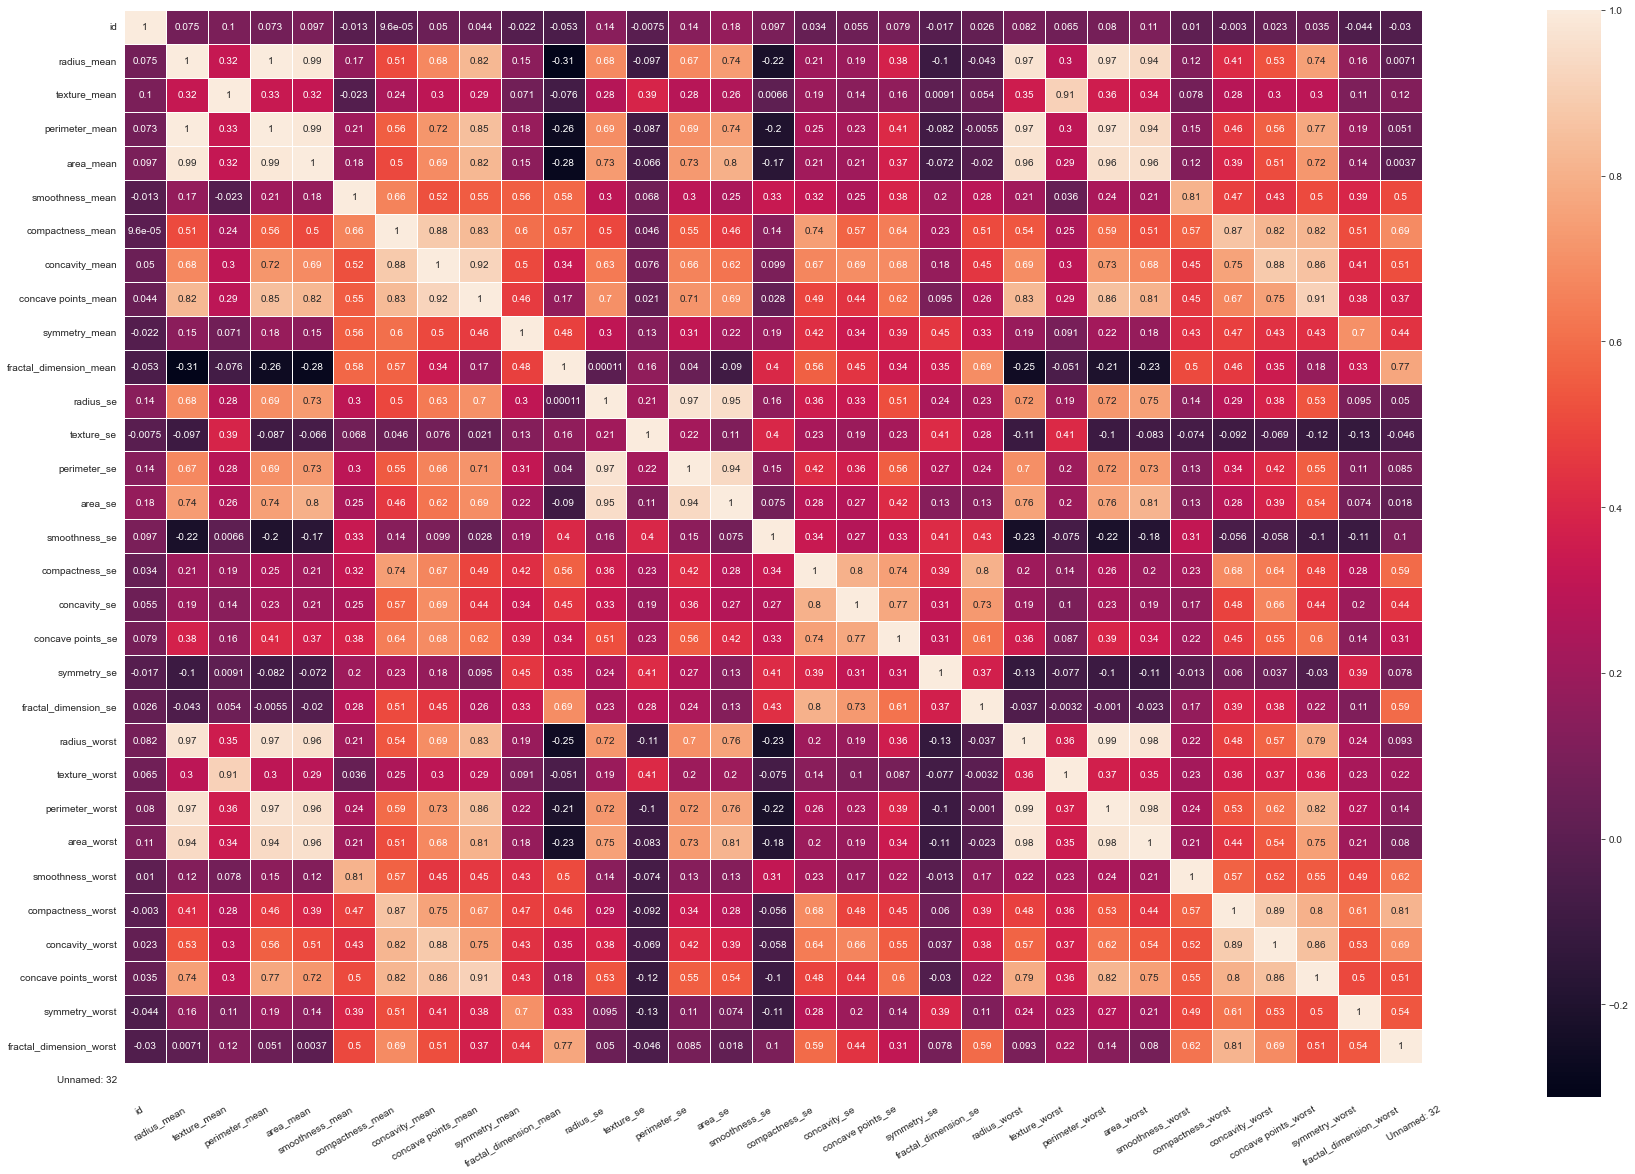

In [206]:
## Correlacao de variaveis
plt.figure(figsize=(30, 20))
sns.heatmap(dataset.corr(), vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

## Preparação dos Dados

### Remoção de coluna nula e coluna refrente ao ID

In [207]:
dataset = dataset.drop(labels="Unnamed: 32", axis=1)
dataset = dataset.drop(labels="id", axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Convertendo variaveis categoricas

In [208]:
## vou optar por label encoding
labelencoder = LabelEncoder()
dataset["diagnosis"] = labelencoder.fit_transform(dataset["diagnosis"])
classes = labelencoder.classes_


In [209]:
classes

array(['B', 'M'], dtype=object)

In [210]:
## agora tenho somente variaveis numéricas
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


### Dividindo em X e Y

In [211]:
X = dataset.drop(['diagnosis'],axis=1)
y = dataset['diagnosis']

### Balanceando o dataset
Duarante a fase exploratória foi observado um numero alto de valores resferentes a classe B (Benigno), um balanceamento pode ser interessante para melhorar o desempenho do modelo e prevenir um superaprendizado em cima de uma unica classe.

In [212]:
## vou optar dor fazer um Under-sampling (ou Random Undersampling) e colocar o mesmo numero de ocorrências para cada classe.

undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)

#### Verificando a distribuição depois do balanceamento

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

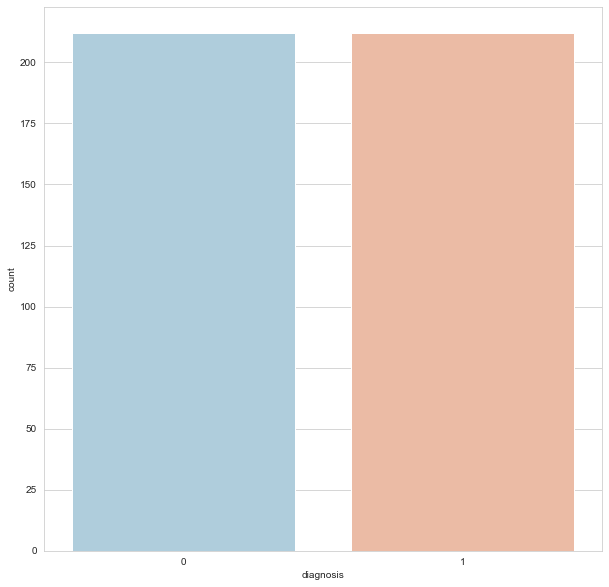

In [213]:
## Grafico representando dados referentes ao numero de diagnosticos de cada categoria
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=pd.DataFrame(y_over),palette='RdBu_r')


### Normalização das variáveis numéricas
Algoritimos de machine learning como regressão linear ou logistica usam o metodo de otimização conhecido como "Método do gradiente" (ou gradiente descent) e requerem que os dados estejam em uma mesma escala.





In [214]:
scaler = preprocessing.MinMaxScaler()
normalized_arr = scaler.fit_transform(X_over)
X_over = pd.DataFrame(normalized_arr, columns=X_over.columns)
X_over.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.231598,0.180250,0.218310,0.131340,0.289236,0.022533,0.024672,0.055070,0.179121,0.159646,...,0.165266,0.222548,0.149255,0.079347,0.141578,0.031202,0.053359,0.139244,0.263355,0.083891
1,0.199275,0.402097,0.190639,0.110487,0.366460,0.071897,0.038824,0.055417,0.151099,0.187869,...,0.157225,0.365139,0.144832,0.072673,0.176233,0.039494,0.047205,0.127663,0.171102,0.069461
2,0.359910,0.237741,0.361431,0.222689,0.501792,0.344108,0.180904,0.305268,0.246154,0.394482,...,0.295373,0.224147,0.280667,0.157131,0.212331,0.169409,0.158632,0.349828,0.120639,0.199725
3,0.331995,0.516740,0.340660,0.208530,0.388183,0.302056,0.236410,0.193340,0.358242,0.283277,...,0.275638,0.525320,0.299985,0.145221,0.360335,0.369644,0.345299,0.414089,0.319732,0.309983
4,0.371174,0.108218,0.357448,0.238179,0.317041,0.111564,0.138051,0.156909,0.076374,0.111626,...,0.318032,0.103945,0.301001,0.175938,0.275143,0.170398,0.253162,0.355670,0.148827,0.129214


### Divisão do dataset

In [215]:
## Dividindo 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X_over,
                                                    y_over, test_size=0.30,
                                                    random_state=1)

## Aplicação do modelo de regressão Logística


### Treinamendo do modelo

In [216]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

### Realizando as predições

In [217]:
predictions = logmodel.predict(X_test)

## Apresentação dos resultados

In [218]:
## obendo as metricas do treinamento
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.99      0.99        67

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [219]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[61,  0],
       [ 1, 66]])

Text(0.5, 257.44, 'Predicted label')

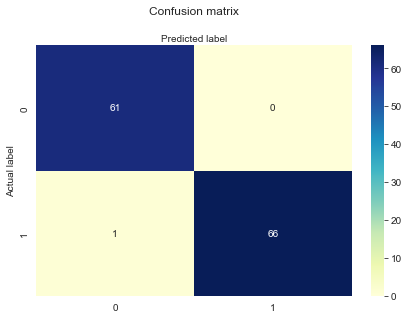

In [220]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
